# Amateur Climbing Competitions
## Principles of Amateur Competition
* Divide into Novice, Intermediate, Advanced, and Open

### Who do we want to award prizes to?
* The best of each division

* Where to place the decision boundary between two divisions?
    * A closer competition is more exciting than one where one person dominates, so placing the boundary near the tail of the higher division may be appropriate.
    * However, this creates losers who were bumped up a division.
* Ideally, we would have more data on both climber and route. Not comprehensive:
    * Climber Stats
        * Height, Weight, Body fat percentage, VO2 max, Limb measurements
            * 
        * Onsight/flash probability for each grade and route type
        * Redpoint/send probability for each grade and route type
            * Associated failure probability for each grade and route type
        * Number of tries until success for each grade and route type
    * Route Stats
        * Routesetter
        * Route length
        * Movement distribution - percentage of dynos, crimps, pockets, splits... etc.
        * Hold database
* Obviously we don't have all this data, so let's make do with what we have.
    * Unfortunately m
        
    
## Simulation and Modeling
### Major Factors to Consider
* Time
    * Total length of competition
    * Availability of boulders to climb based on the population of entrants and their abilities
* Send percentages per difficulty
* Pump factor
    * Like old-school health bar, where it gets decreased for every problem, but is able to recover to a certain point given enough time
### Individual Climber Models
* With lots of data, tracking over time - Kalman filter?
* Sandbagger - climbers trying to lower themselves into an easier division
### Anti-sandbagging measures

In [69]:
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.neighbors.kde import KernelDensity
from scipy.signal import argrelextrema
from scipy import stats

%matplotlib nbagg

$A = amplitude$

$\phi = phase$

$\nu = frequency$

$A \sin(2 \pi(\nu x + \phi)$

<IPython.core.display.Javascript object>


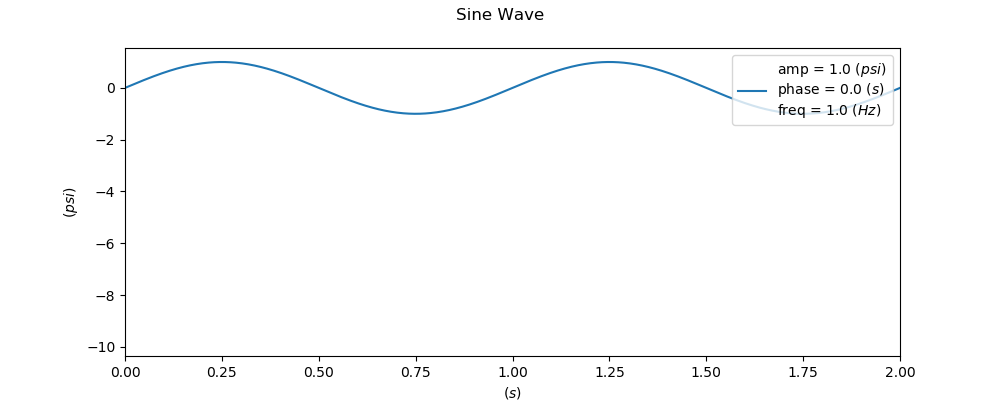

interactive(children=(FloatSlider(value=1.0, description='Amp:', max=10.0, min=1.0), FloatSlider(value=0.0, de…

In [70]:
x = np.linspace(0, 2, 1000)
fig, ax = plt.subplots(1, figsize=(10, 4))
plt.suptitle('Sine Wave')


def update_plot(amp, phase, freq):
    """
    this function is linked to the sliders and 
    it replots the sine wave when the sliders are changed
    """
    ax.clear()
    
    units = 'amp = {} $(psi)$ \nphase = {} $(s)$ \nfreq = {} $(Hz)$' 
    y = amp * np.sin(2 * np.pi * (freq * x + phase))

    ax.plot(x, y, label=units.format(amp, phase, freq))
    ax.legend(loc=1)
    ax.set_xlabel('$(s)$')
    ax.set_ylabel('$(psi)$')
    ax.set_xlim(x[0],x[-1])
    plt.show()


amp = widgets.FloatSlider(min=1, max=10, value=1, description='Amp:')
phase = widgets.FloatSlider(min=0, max=5, value=0, description='Phase:')
freq = widgets.FloatSlider(min=1, max=10, value=1, description='Freq:')

widgets.interactive(update_plot, amp=amp, phase=phase, freq=freq)

<IPython.core.display.Javascript object>


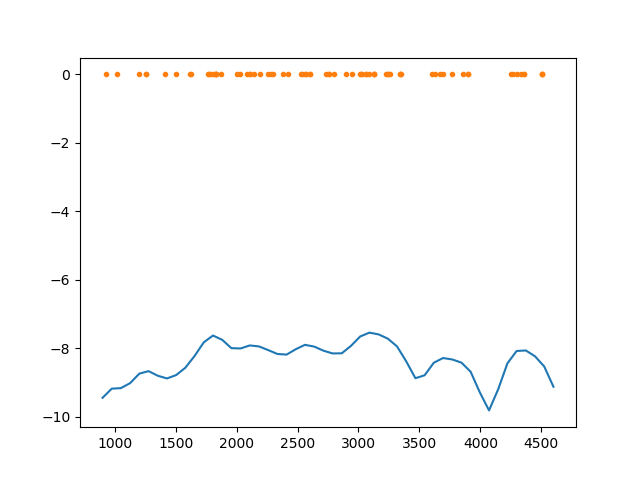

Minima: [1428.57142857 2032.65306122 2410.20408163 2787.75510204 3467.34693878
 4071.42857143]
Maxima: [1277.55102041 1806.12244898 2108.16326531 2561.2244898  3089.79591837
 3693.87755102 4373.46938776]
Max:  4505  Min:  930


In [72]:
# Kernel Density Estimation using Scipy
x = np.array([
    4505, 4505, 4505, 4355, 4355, 4330, 4300, 4265, 4250, 3895, 3895, 3855,
    3690, 3600, 3765, 3670, 3630, 3350, 3340, 3340, 3260, 3240, 3240, 3090,
    3030, 3020, 2800, 2760, 2730, 2280, 2140, 2005, 3230, 3130, 3130, 3130,
    3060, 3060, 3010, 2950, 2900, 2760, 2600, 2600, 2570, 2560, 2540, 2530,
    2420, 2380, 2300, 2260, 2190, 2110, 2085, 1835, 1825, 1805, 1785, 1765,
    2110, 2030, 1870, 1830, 1830, 1770, 1625, 1615, 1505, 1410, 1260, 1260,
    1200, 1015, 930
]).reshape(-1, 1)
kde = KernelDensity(kernel='gaussian', bandwidth=100).fit(x)
s = np.linspace(900, 4600)
e = kde.score_samples(s.reshape(-1, 1))
plt.figure()
plt.plot(s, e)
plt.plot(x, np.zeros(np.size(x)), '.')

mi, ma = argrelextrema(e, np.less)[0], argrelextrema(e, np.greater)[0]
print("Minima:", s[mi])
print("Maxima:", s[ma])
print("Max: ", np.max(x), " Min: ", np.min(x))


<IPython.core.display.Javascript object>


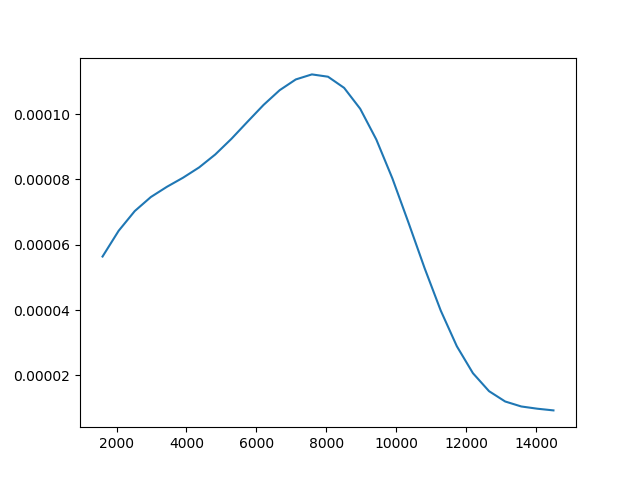

In [145]:
x = np.array([
    14500,
    9600,
    10200,
    6600,
    3200,
    2700,
    2400,
    1600,
    1600,
    1600,
    9600,
    10100,
    8100,
    7200,
    8600,
    8400,
    8600,
    8400,
    7400,
    7200,
    9600,
    6400,
    5900,
    6100,
    5200,
    5000,
    5200,
    3400,
    3700,
])
density = stats.kde.gaussian_kde(x)
xgrid = np.linspace(x.min(), x.max(), x.size)
plt.figure()
plt.plot(xgrid, density(xgrid))

In [80]:
def get_jenks_breaks(data_list, number_class):
    data_list.sort()
    mat1 = []
    for i in range(len(data_list) + 1):
        temp = []
        for j in range(number_class + 1):
            temp.append(0)
        mat1.append(temp)
    mat2 = []
    for i in range(len(data_list) + 1):
        temp = []
        for j in range(number_class + 1):
            temp.append(0)
        mat2.append(temp)
    for i in range(1, number_class + 1):
        mat1[1][i] = 1
        mat2[1][i] = 0
        for j in range(2, len(data_list) + 1):
            mat2[j][i] = float('inf')
    v = 0.0
    for l in range(2, len(data_list) + 1):
        s1 = 0.0
        s2 = 0.0
        w = 0.0
        for m in range(1, l + 1):
            i3 = l - m + 1
            val = float(data_list[i3 - 1])
            s2 += val * val
            s1 += val
            w += 1
            v = s2 - (s1 * s1) / w
            i4 = i3 - 1
            if i4 != 0:
                for j in range(2, number_class + 1):
                    if mat2[l][j] >= (v + mat2[i4][j - 1]):
                        mat1[l][j] = i3
                        mat2[l][j] = v + mat2[i4][j - 1]
        mat1[l][1] = 1
        mat2[l][1] = v
    k = len(data_list)
    kclass = []
    for i in range(number_class + 1):
        kclass.append(min(data_list))
    kclass[number_class] = float(data_list[len(data_list) - 1])
    count_num = number_class
    while count_num >= 2:  # print "rank = " + str(mat1[k][count_num])
        idx = int((mat1[k][count_num]) - 2)
        # print "val = " + str(data_list[idx])
        kclass[count_num - 1] = data_list[idx]
        k = int((mat1[k][count_num] - 1))
        count_num -= 1
    return kclass

<IPython.core.display.Javascript object>


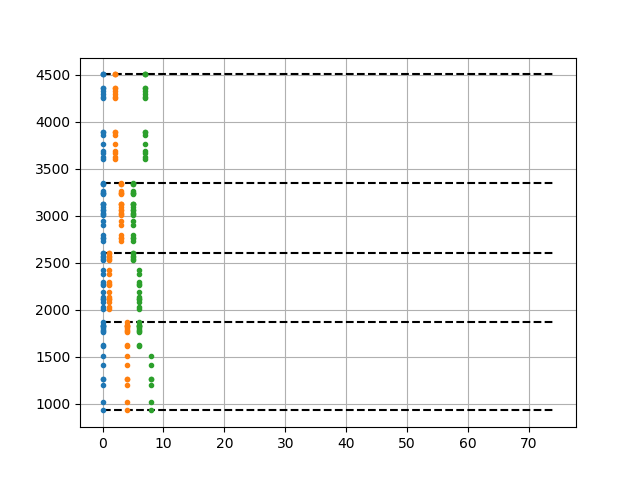

In [146]:
x = np.array([
    4505, 4505, 4505, 4355, 4355, 4330, 4300, 4265, 4250, 3895, 3895, 3855,
    3690, 3600, 3765, 3670, 3630, 3350, 3340, 3340, 3260, 3240, 3240, 3090,
    3030, 3020, 2800, 2760, 2730, 2280, 2140, 2005, 3230, 3130, 3130, 3130,
    3060, 3060, 3010, 2950, 2900, 2760, 2600, 2600, 2570, 2560, 2540, 2530,
    2420, 2380, 2300, 2260, 2190, 2110, 2085, 1835, 1825, 1805, 1785, 1765,
    2110, 2030, 1870, 1830, 1830, 1770, 1625, 1615, 1505, 1410, 1260, 1260,
    1200, 1015, 930
])
n_clusters = 4
breaks = get_jenks_breaks(x, n_clusters)

plt.figure()
for line in breaks:
    plt.plot([line for _ in range(len(x))], 'k--')


plt.plot(np.zeros(np.size(x)), x, '.')
plt.grid(True)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(x.reshape(-1, 1))
labels = kmeans.labels_
plt.plot(1+labels,x,'.')

from sklearn.mixture import GaussianMixture
X = np.append(x.reshape(-1,1),np.zeros([x.size,1]),axis=1)

gmm = GaussianMixture(n_components=n_clusters,covariance_type='spherical',random_state=0).fit(X)
labels = gmm.predict(X)
plt.plot(5+labels,x,'.')